## 4.06 Lab | Random variable distributions

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [17]:
# Cell-to-cell script
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [18]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


**1.Get the numerical variables from our dataset.**

In [19]:
numericals = data.select_dtypes(np.number)

In [20]:
numericals

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


**2.Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.**

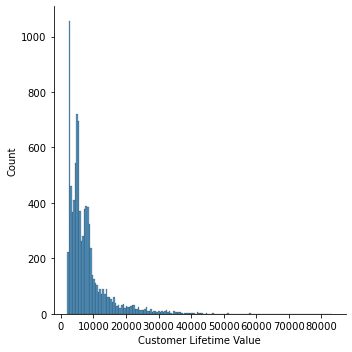

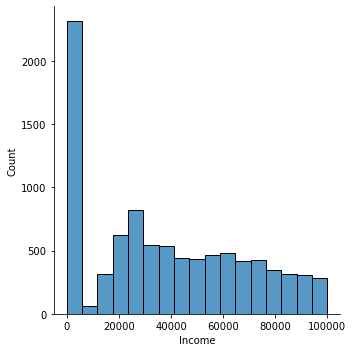

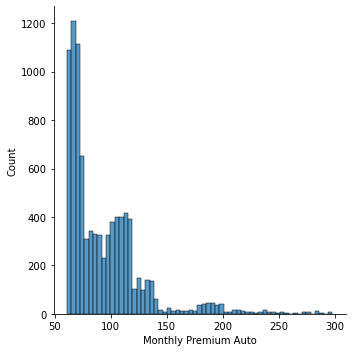

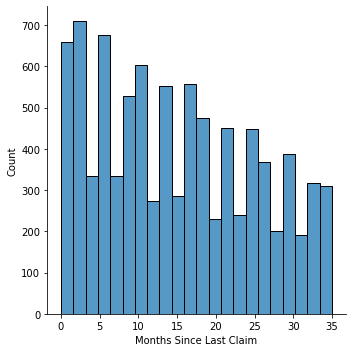

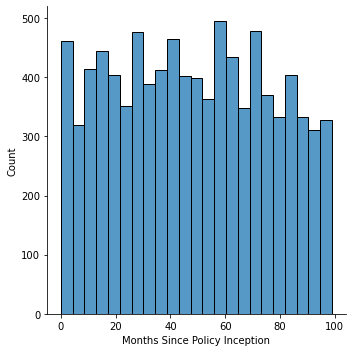

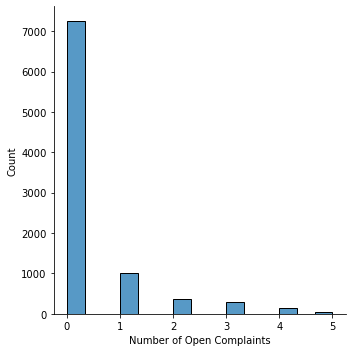

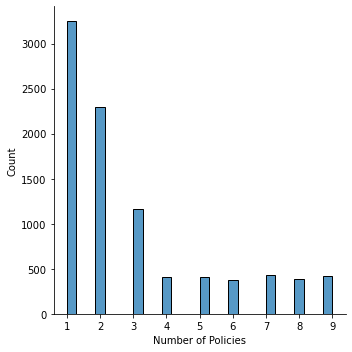

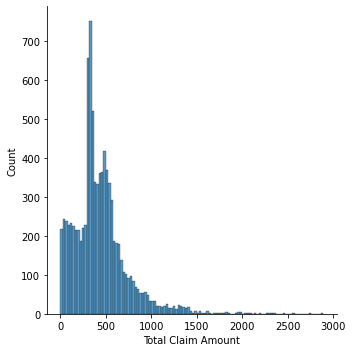

In [21]:
for column in numericals:
    sns.displot(numericals[column])

In [22]:
numericals.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

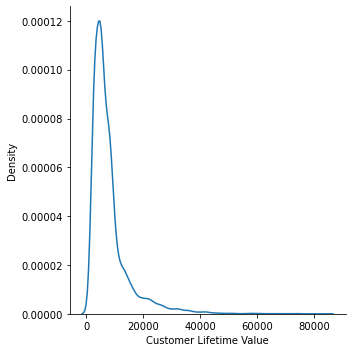

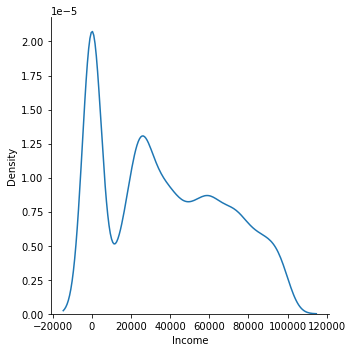

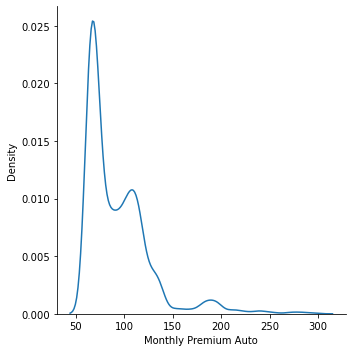

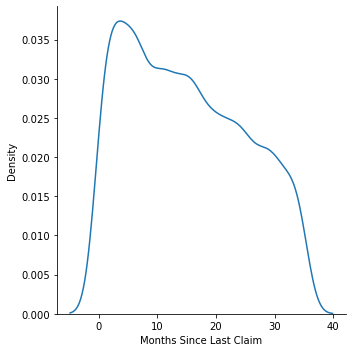

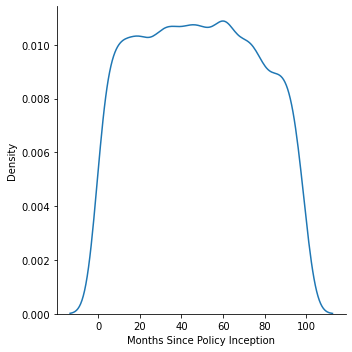

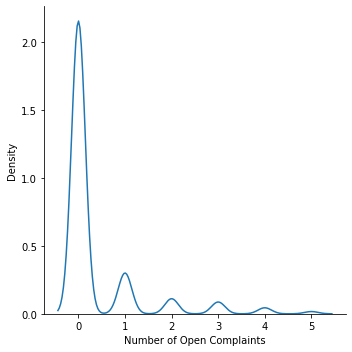

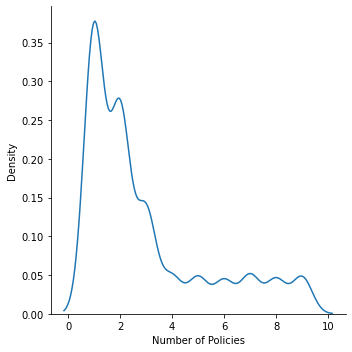

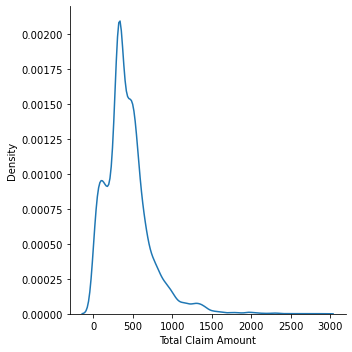

In [23]:
for column in numericals:
    sns.displot(numericals[column],kind='kde')           

In [24]:
#

In [25]:
numericals.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

**3.Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.**

C:\Users\Elena\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


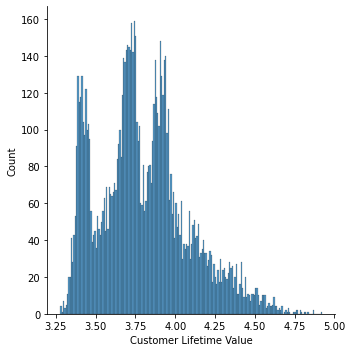

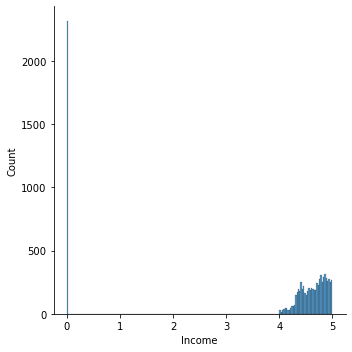

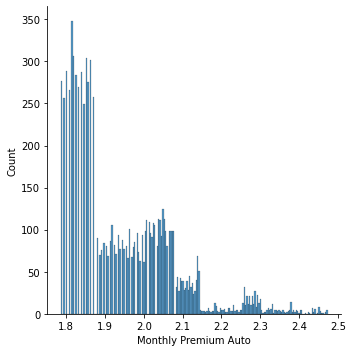

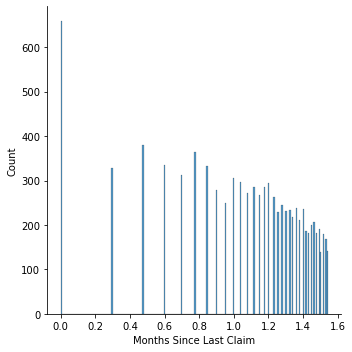

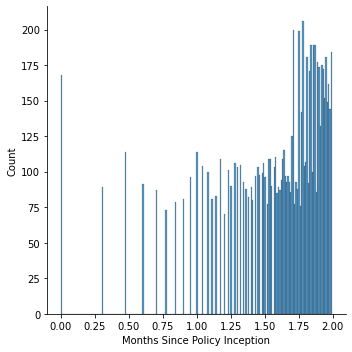

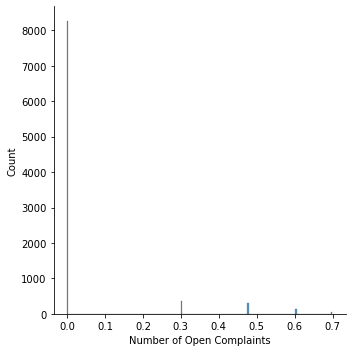

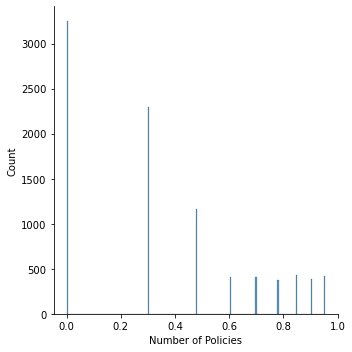

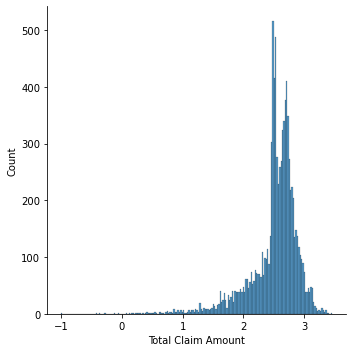

In [35]:
#LOG TRANSFORM ALL VARIABLES:
def log_transform(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0
numericals_log = numericals
for i in numericals_log.columns:
    numericals_log[i] = numericals_log[i].apply(log_transform)

for i in numericals_log.columns:
    sns.displot(data=numericals_log[i],bins=200)

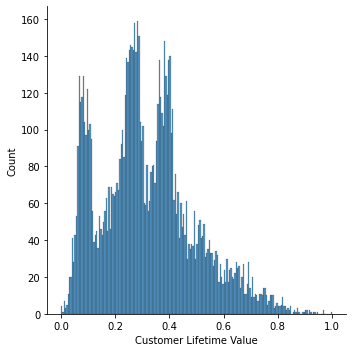

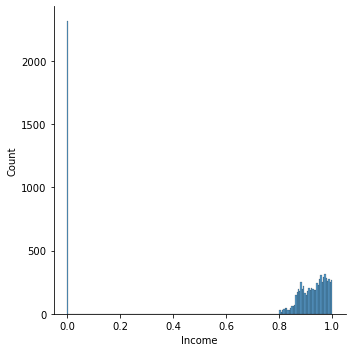

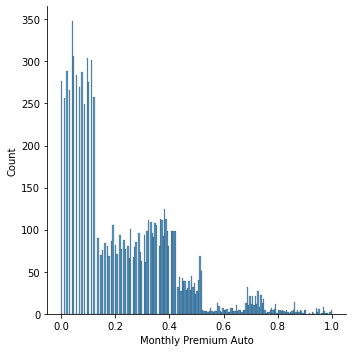

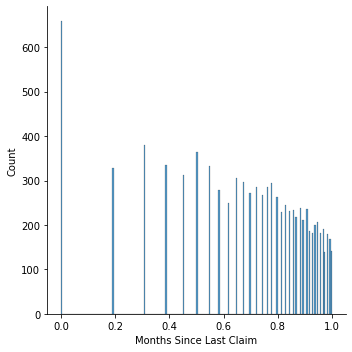

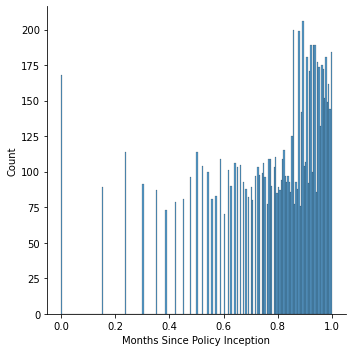

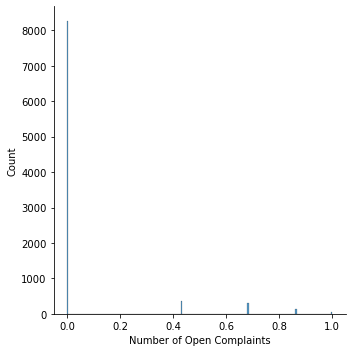

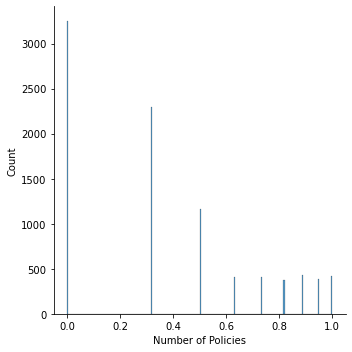

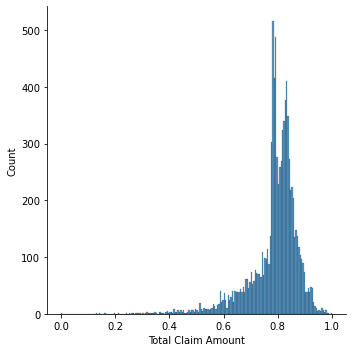

In [37]:
#MINMAX ALL VARIABLES:
from sklearn.preprocessing import MinMaxScaler

numericals_minmax = numericals

transformer = MinMaxScaler().fit(numericals_minmax)
numericals_minmax = transformer.transform(numericals_minmax)
numericals_minmax = pd.DataFrame(numericals_minmax, columns=numericals.columns)

for i in numericals_minmax.columns:
    sns.displot(numericals_minmax[i],bins=200)

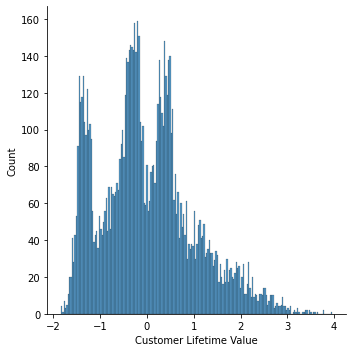

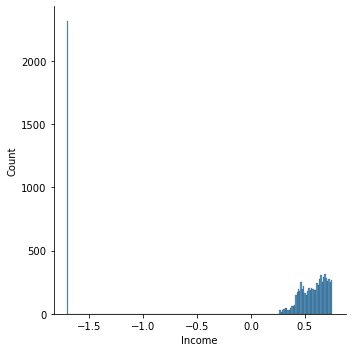

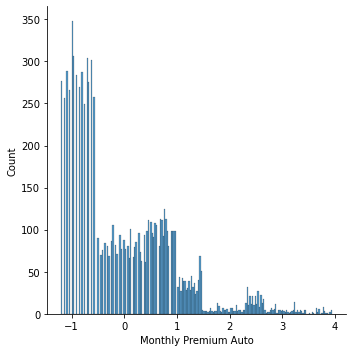

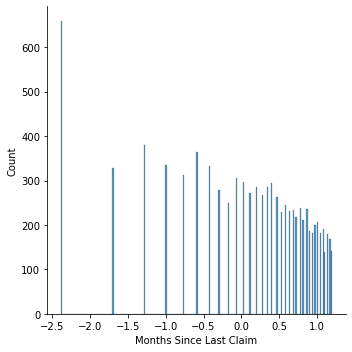

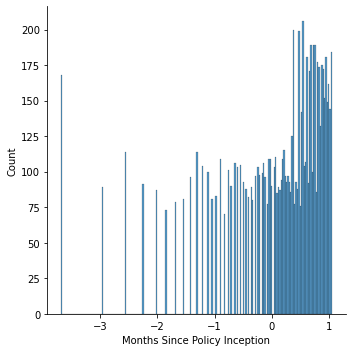

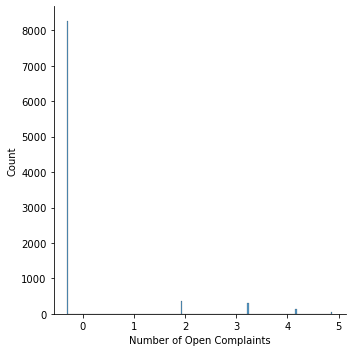

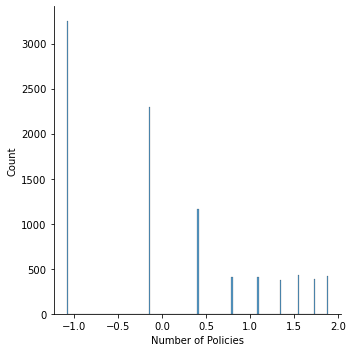

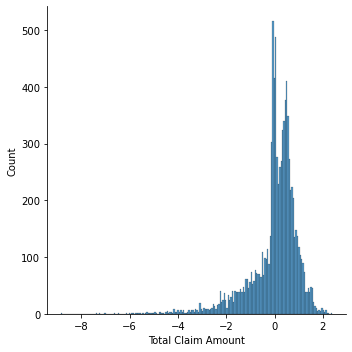

In [38]:
#STANDARDSCALER
from sklearn.preprocessing import StandardScaler

numericals_st = numericals

numericals_st = pd.DataFrame(StandardScaler().fit(numericals_st).transform(numericals_st), columns=numericals.columns)

for i in numericals_st.columns:
    sns.displot(numericals_st[i],bins=200)